In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import curve_fit

def gauss(x,mu,sig,H,A):
    return H + A * np.exp(-(x - mu) ** 2 / (2 * sig ** 2))


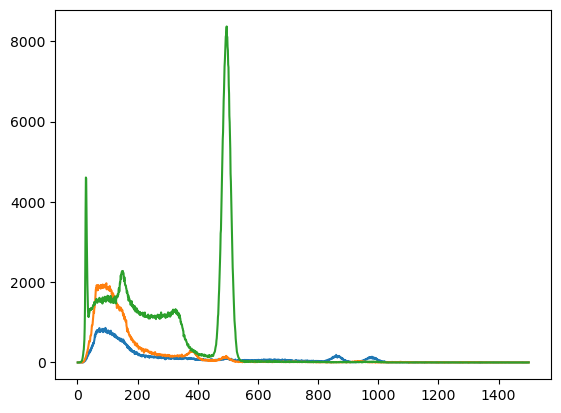

In [19]:
Co60 = np.loadtxt('Co60cal.txt')[:1500]
Na22 = np.loadtxt('Na22cal.txt')[:1500]
Cs137 = np.loadtxt('Cs137cal.txt')[:1500]

channels = np.arange(1,1501)

plt.plot(channels,Co60)
plt.plot(channels,Na22)
plt.plot(channels,Cs137)

861.3757230959224 17.43099354982607


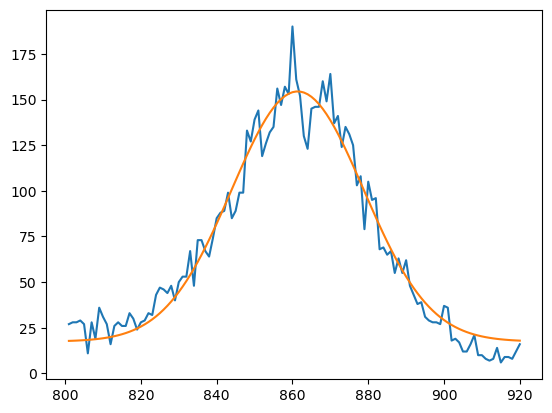

In [20]:
corange1 = [800,920]
cochannels1 = channels[corange1[0]:corange1[1]]
codata1 = Co60[corange1[0]:corange1[1]]
plt.plot(cochannels1, codata1)

poptco1, pcovco1 = curve_fit(gauss, cochannels1, codata1,[860,30,10,100])

plt.plot(cochannels1, gauss(cochannels1,*poptco1))

print(poptco1[0],poptco1[1])

977.0473748402849 19.082859581409686


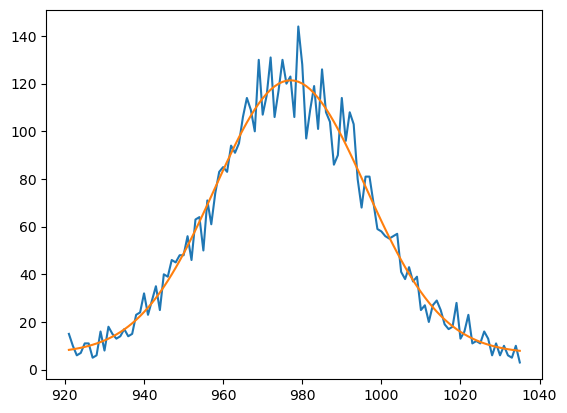

In [21]:
corange2 = [920,1035]
cochannels2 = channels[corange2[0]:corange2[1]]
codata2 = Co60[corange2[0]:corange2[1]]
plt.plot(cochannels2, codata2)

poptco2, pcovco2 = curve_fit(gauss, cochannels2, codata2,[980,30,10,100])

plt.plot(cochannels2, gauss(cochannels2,*poptco2))

print(poptco2[0],poptco2[1])

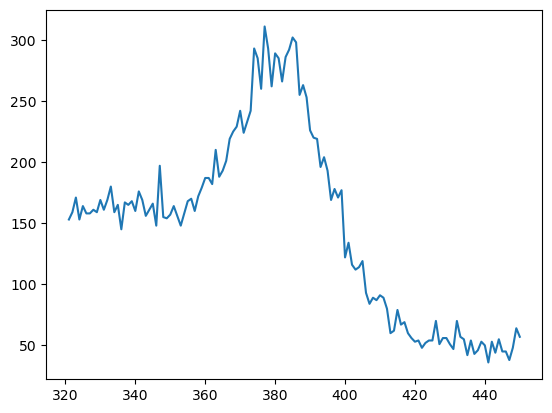

In [22]:
narange1 = [320,450]
plt.plot(channels[narange1[0]:narange1[1]], Na22[narange1[0]:narange1[1]])

934.4302809452802 15.7895310803301


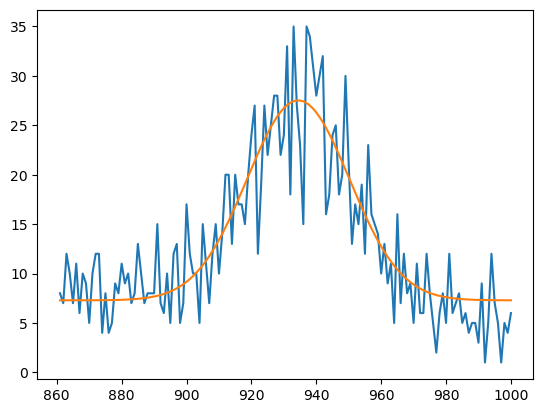

In [23]:
narange2 = [860,1000]
nachannels2 = channels[narange2[0]:narange2[1]]
nadata2 = Na22[narange2[0]:narange2[1]]
plt.plot(nachannels2, nadata2)

poptna2, pcovna2 = curve_fit(gauss, nachannels2, nadata2,[940,30,20,40])

plt.plot(nachannels2, gauss(nachannels2,*poptna2))

print(poptna2[0],poptna2[1])

495.052114658285 -13.424211822811474


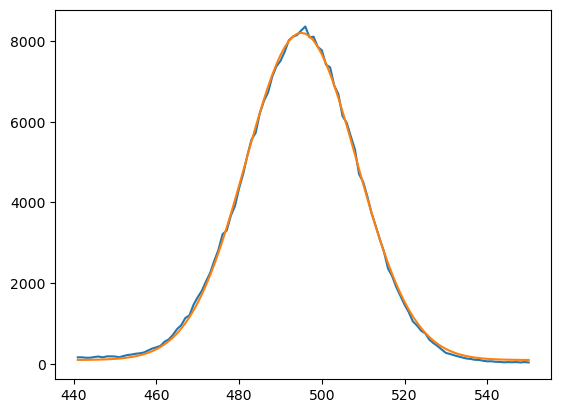

In [24]:
csrange = [440,550]
cschannels = channels[csrange[0]:csrange[1]]
csdata = Cs137[csrange[0]:csrange[1]]
plt.plot(cschannels, csdata)

poptcs, pcovcs = curve_fit(gauss, cschannels, csdata,[500,30,20,400])

plt.plot(cschannels, gauss(cschannels,*poptcs))

print(poptcs[0],poptcs[1])

<ErrorbarContainer object of 3 artists>

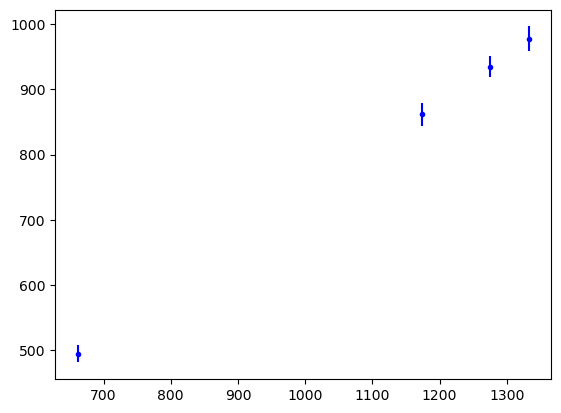

In [28]:
energychannels = [poptco1[0],poptco2[0],poptna2[0],poptcs[0]]
sigmas = abs(np.array([poptco1[1],poptco2[1],poptna2[1],poptcs[1]]))
energies = [1173.2,1332.5,1274.6,661.6]

plt.errorbar(energies,energychannels,sigmas,fmt='b.')
